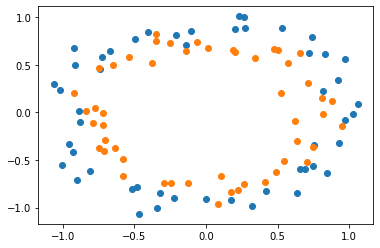

In [ ]:
# Primeira técnica de Better Generalization - Ruído Gaussiano Estudo de Caso

# scatter plot of circles dataset
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# scatter plot for each class value
for class_value in range(2):
	# select indices of points with the class label
	row_ix = np.where(y == class_value)
	# scatter plot for points with a different color
	plt.scatter(x[row_ix, 0], x[row_ix, 1])
# show plot
plt.show()


Train: 1.000, Test: 0.771


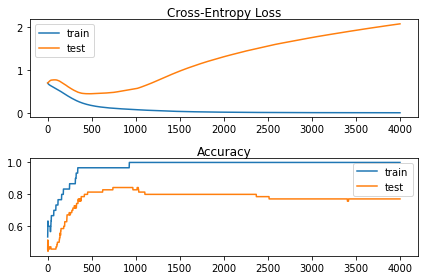

In [ ]:
# Modelo com problema de overfit

# mlp overfit on the two circles dataset
from sklearn.datasets import make_circles
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[: n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Train: 0.933, Test: 0.700


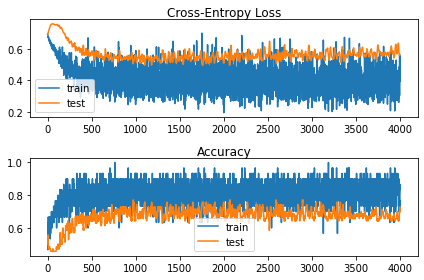

In [ ]:
# Ruído Gaussiano na camada de entrada

# mlp overfit on the two circles dataset with input noise
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianNoise
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(GaussianNoise(0.1, input_shape=(2,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Train: 0.933, Test: 0.829


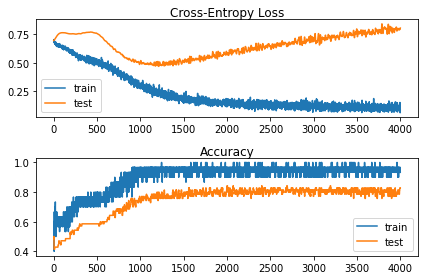

In [ ]:
# Ruído Gaussiano antes da função de ativação

# mlp overfit on the two circles dataset with hidden layer noise
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import GaussianNoise
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2))
model.add(GaussianNoise(0.1))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Train: 1.000, Test: 0.786


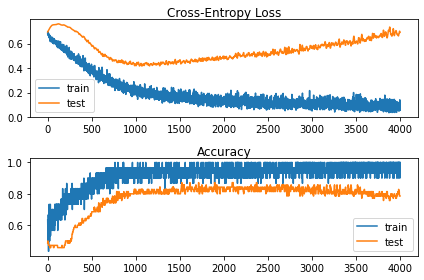

In [ ]:
# Ruído após a função de ativação

# mlp overfit on the two circles dataset with hidden layer noise
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import GaussianNoise
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2,activation='relu'))
model.add(GaussianNoise(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Train: 0.967, Test: 0.700


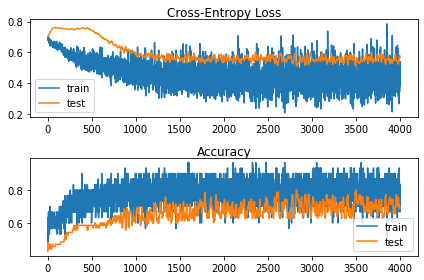

In [ ]:
# Ruído Gaussiano na camada de entrada e antes da função de ativação

# mlp overfit on the two circles dataset with hidden layer noise
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import GaussianNoise
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(GaussianNoise(0.1, input_shape=(2,)))
model.add(Dense(500, input_dim=2))
model.add(GaussianNoise(0.1))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Train: 0.867, Test: 0.643


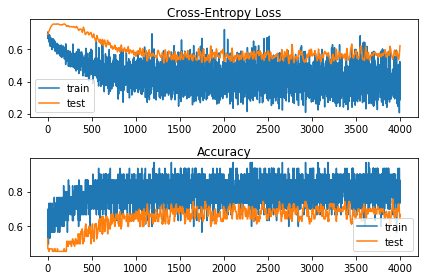

In [ ]:
# Ruído Gaussiano na camada de entrada e depois da função de ativação

# mlp overfit on the two circles dataset with hidden layer noise
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import GaussianNoise
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(GaussianNoise(0.1, input_shape=(2,)))
model.add(Dense(500, input_dim=2))
model.add(Activation('relu'))
model.add(GaussianNoise(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()


Param: 0.300000, Train: 0.900, Test: 0.814
Param: 0.200000, Train: 0.967, Test: 0.771
Param: 0.100000, Train: 0.933, Test: 0.814
Param: 0.010000, Train: 1.000, Test: 0.757
Param: 0.001000, Train: 1.000, Test: 0.757


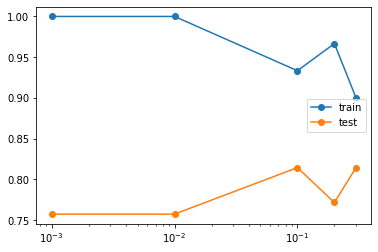

In [ ]:
# Grid search

# mlp overfit on the two circles dataset with hidden layer noise
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import GaussianNoise
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# grid search values
values = [0.3, 0.2, 0.1, 0.01, 0.001]
all_train, all_test = list(), list()

for param in values:
  # define model
  model = Sequential()
  model.add(Dense(500, input_dim=2))
  model.add(GaussianNoise(param))
  model.add(Activation('relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  # fit model
  model.fit(train_x, train_y, epochs=4000, verbose=0)

  # evaluate the model
  _, train_acc = model.evaluate(train_x, train_y, verbose=0)
  _, test_acc = model.evaluate(test_x, test_y, verbose=0)
  print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
  all_train.append(train_acc)
  all_test.append(test_acc)

# plot train and test means
plt.semilogx(values, all_train, label='train', marker='o')
plt.semilogx(values, all_test, label='test', marker='o')
plt.legend()
plt.show()


Param: 0.100000, Train: 0.933, Test: 0.800
Param: 0.200000, Train: 0.933, Test: 0.771
Param: 0.300000, Train: 0.900, Test: 0.829
Param: 0.400000, Train: 0.667, Test: 0.757
Param: 0.500000, Train: 0.567, Test: 0.600
Param: 0.600000, Train: 0.533, Test: 0.600


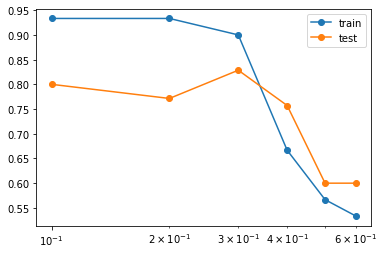

In [ ]:
# Grid search

# mlp overfit on the two circles dataset with hidden layer noise
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import GaussianNoise
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# grid search values
values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
all_train, all_test = list(), list()

for param in values:
  # define model
  model = Sequential()
  model.add(Dense(500, input_dim=2))
  model.add(GaussianNoise(param))
  model.add(Activation('relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  # fit model
  model.fit(train_x, train_y, epochs=4000, verbose=0)

  # evaluate the model
  _, train_acc = model.evaluate(train_x, train_y, verbose=0)
  _, test_acc = model.evaluate(test_x, test_y, verbose=0)
  print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
  all_train.append(train_acc)
  all_test.append(test_acc)

# plot train and test means
plt.semilogx(values, all_train, label='train', marker='o')
plt.semilogx(values, all_test, label='test', marker='o')
plt.legend()
plt.show()
